In [12]:
import numpy as np
import pandas as pd

# Function to simulate data with leaks
def simulate_leak_data(num_samples, num_features):
    # Generate random features (sensor readings, flow rates, pressure data, etc.)
    features = np.random.rand(num_samples, num_features)
    
    # Introduce artificial leaks in the data
    # For example, we can randomly select a subset of samples and modify one of the features to indicate a leak
    num_leaks = int(0.1 * num_samples)  # Let's say 10% of samples have leaks
    leak_indices = np.random.choice(num_samples, num_leaks, replace=False)
    
    for idx in leak_indices:
        # Randomly select a feature to represent the leak
        leak_feature_idx = np.random.randint(num_features)
        # Modify the selected feature to indicate a leak (e.g., increase its value)
        features[idx, leak_feature_idx] *= 1.5  # Increase the feature value
        
    # Generate labels indicating whether a leak occurred (1) or not (0)
    labels = np.zeros(num_samples)
    labels[leak_indices] = 1
    
    return features, labels

# Simulate data with leaks
num_samples = 1000
num_features = 10

X, y = simulate_leak_data(num_samples, num_features)

# Convert to DataFrame for better visualization
data = pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(num_features)])
data['Leak'] = y

# Display simulated data
print("Simulated data with leaks:")
print(data.head())


Simulated data with leaks:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.893657   0.831642   0.267997   0.394594   0.726966   0.847225   
1   0.726889   0.812191   0.593846   0.726258   0.342192   0.626178   
2   0.037922   0.741249   0.774598   0.588525   0.463686   0.176376   
3   0.393607   0.537425   0.795298   0.989743   0.948820   0.779304   
4   0.195458   0.426787   0.240753   0.520134   0.893156   0.227319   

   Feature_7  Feature_8  Feature_9  Feature_10  Leak  
0   0.420839   0.546885   0.029616    0.384624   0.0  
1   0.030054   0.576257   0.268134    0.314626   0.0  
2   0.443352   0.561929   0.838123    0.371947   0.0  
3   0.388607   0.441459   0.997726    0.408326   0.0  
4   0.846306   0.241516   0.362001    0.713979   0.0  


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from tabulate import tabulate

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),  
    "Random Forest": RandomForestClassifier(class_weight='balanced'),  
    "Support Vector Machine": SVC(class_weight='balanced'),  
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(class_weight='balanced'),  
    "Neural Network (MLP)": MLPClassifier(max_iter=1000)
}

# Define a list to store the evaluation metrics for each model
metrics_data = []

# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append the evaluation metrics to the list
    metrics_data.append([name, accuracy, precision, recall, f1])

# Print the evaluation metrics in a table
print(tabulate(metrics_data, headers=["Model", "Accuracy", "Precision", "Recall", "F1 Score"], tablefmt="github"))


c:\Users\pugal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


| Model                        |   Accuracy |   Precision |   Recall |   F1 Score |
|------------------------------|------------|-------------|----------|------------|
| Logistic Regression          |      0.55  |   0.0625    |     0.25 |  0.1       |
| Random Forest                |      0.905 |   1         |     0.05 |  0.0952381 |
| Support Vector Machine       |      0.725 |   0.0731707 |     0.15 |  0.0983607 |
| K-Nearest Neighbors          |      0.9   |   0         |     0    |  0         |
| Gradient Boosting Classifier |      0.91  |   0.75      |     0.15 |  0.25      |
| Decision Tree Classifier     |      0.855 |   0.2       |     0.15 |  0.171429  |
| Neural Network (MLP)         |      0.88  |   0         |     0    |  0         |


c:\Users\pugal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


c:\Users\pugal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pugal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pugal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


| Model                        |   Accuracy |   Precision |    Recall |   F1 Score |
|------------------------------|------------|-------------|-----------|------------|
| Logistic Regression          |      0.575 |    0.16092  | 0.538462  |  0.247788  |
| Random Forest                |      0.87  |    0        | 0         |  0         |
| Support Vector Machine       |      0.745 |    0.162162 | 0.230769  |  0.190476  |
| K-Nearest Neighbors          |      0.87  |    0        | 0         |  0         |
| Gradient Boosting Classifier |      0.915 |    1        | 0.346154  |  0.514286  |
| Decision Tree Classifier     |      0.83  |    0.3      | 0.230769  |  0.26087   |
| Neural Network (MLP)         |      0.865 |    0.333333 | 0.0384615 |  0.0689655 |


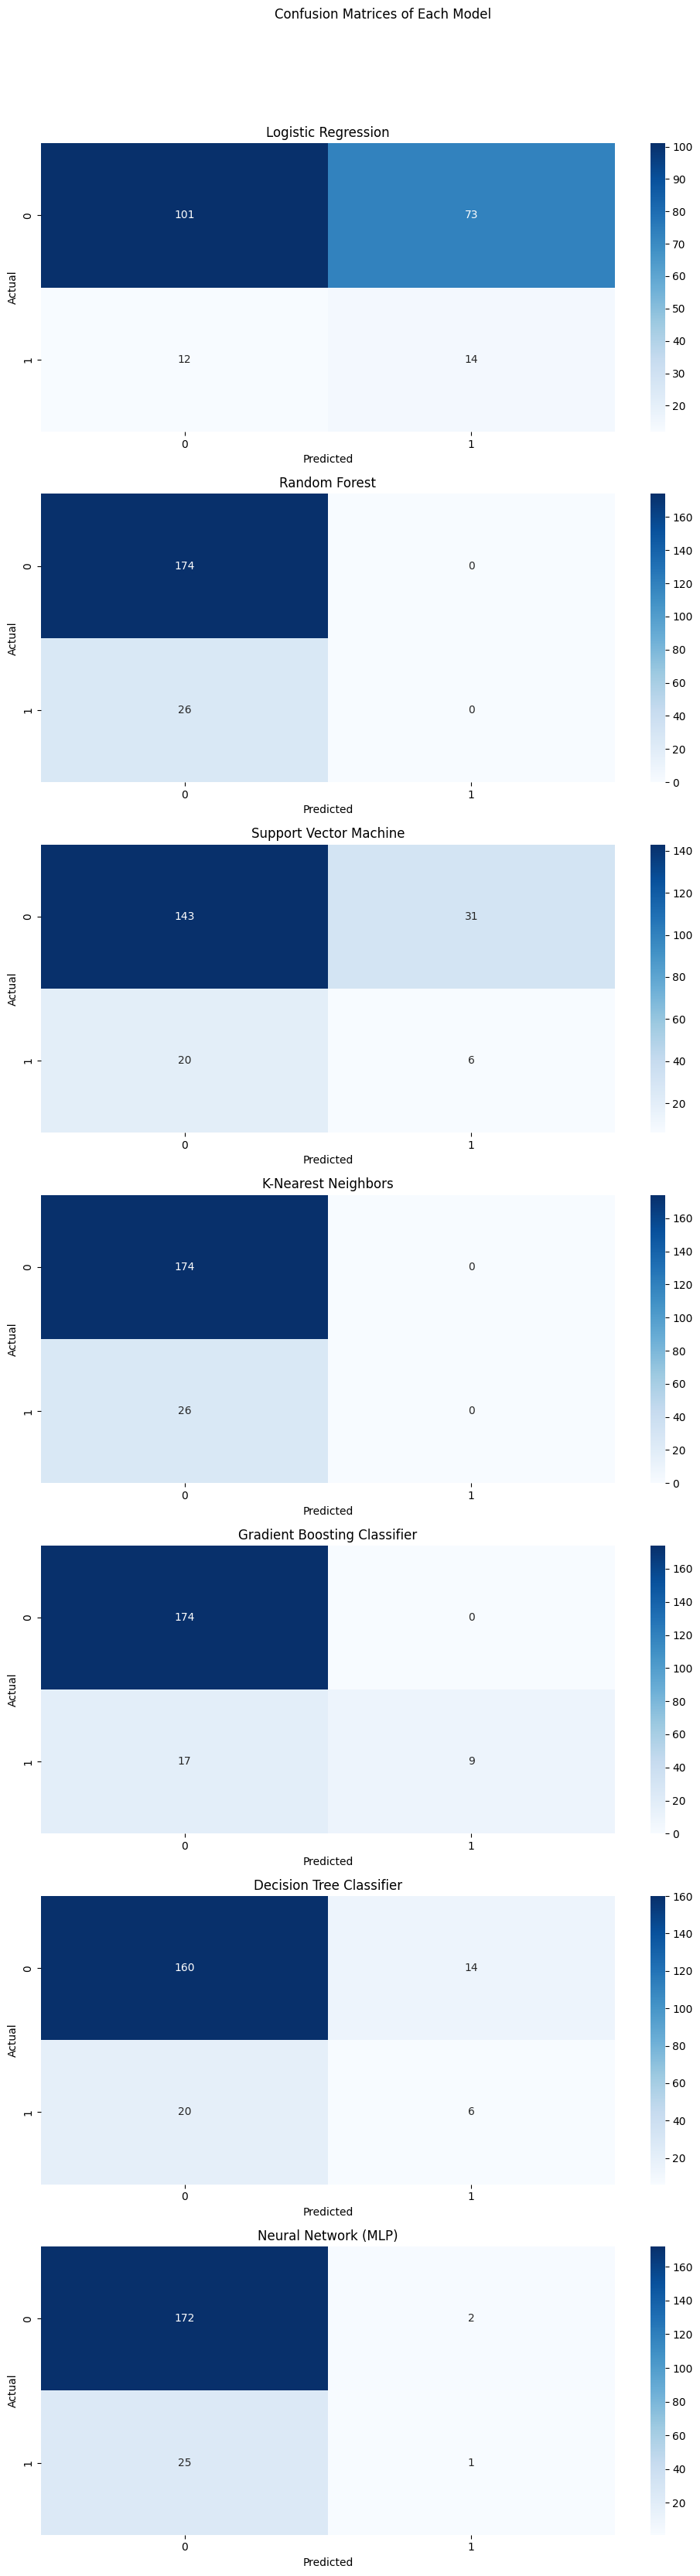

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from tabulate import tabulate

# Function to simulate data with leaks
def simulate_leak_data(num_samples, num_features):
    features = np.random.rand(num_samples, num_features)
    num_leaks = int(0.1 * num_samples)
    leak_indices = np.random.choice(num_samples, num_leaks, replace=False)
    
    for idx in leak_indices:
        leak_feature_idx = np.random.randint(num_features)
        features[idx, leak_feature_idx] *= 1.5
        
    labels = np.zeros(num_samples)
    labels[leak_indices] = 1
    
    return features, labels

# Simulate data with leaks
num_samples = 1000
num_features = 10

X, y = simulate_leak_data(num_samples, num_features)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),  
    "Random Forest": RandomForestClassifier(class_weight='balanced'),  
    "Support Vector Machine": SVC(class_weight='balanced'),  
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(class_weight='balanced'),  
    "Neural Network (MLP)": MLPClassifier(max_iter=1000)
}

# Define a list to store the evaluation metrics for each model
metrics_data = []

# Plotting setup
fig, axs = plt.subplots(len(models), 1, figsize=(10, len(models)*5))
fig.suptitle('Confusion Matrices of Each Model')

# Training, evaluating, and plotting each model
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append the evaluation metrics to the list
    metrics_data.append([name, accuracy, precision, recall, f1])
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[i])
    axs[i].set_title(name)
    axs[i].set_ylabel('Actual')
    axs[i].set_xlabel('Predicted')

# Print the evaluation metrics in a table
print(tabulate(metrics_data, headers=["Model", "Accuracy", "Precision", "Recall", "F1 Score"], tablefmt="github"))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
